# Training and test set alternative split
- Ano com mais permanência de usuário
- season recommendation
- bipartite block with most permanence

Alto nível de persistência:

$[2005,2013]$ training

$[2014,2018]$ test


Baixo nível de persistência porém mais dados:

$[2005,2017]$ training

$2018$ test

ou

$[2005,2016]$ training

$[2017,2018]$ test

É importante a unidade de separação do dataset ser o ano.

In [2]:
import pandas as pd
import numpy as np

## read phoenix.csv check-in file

In [3]:
def string_to_array(string):
    if string == '':
        return list()
    return eval(string)
def string_to_date(string):
    return pd.to_datetime(string)

df_checkin_phoenix=pd.read_csv("../data/checkin/phoenix.csv",converters={'categories':string_to_array})
df_checkin_phoenix['date']=pd.to_datetime(df_checkin_phoenix['date'])
df_checkin_phoenix.head()

,user_id,business_id,date,latitude,longitude,categories,subarea_id
0,dUVOC_2EDF0sbA392RhfoQ,WTqjgwHlXbSFevF32_DJVw,2015-01-20 20:16:11,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
1,8Y_irXocZdZxLs_qgzpjBw,WTqjgwHlXbSFevF32_DJVw,2017-03-17 06:36:38,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
2,wM4yVwPDeMMUxwFvGLiREg,WTqjgwHlXbSFevF32_DJVw,2017-12-19 05:33:02,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
3,8-tL6MQbXPawMlaf8kbqHg,WTqjgwHlXbSFevF32_DJVw,2014-02-04 01:20:04,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
4,L8d61tDHFB5CemHBUvxn-g,WTqjgwHlXbSFevF32_DJVw,2016-07-12 20:49:43,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0


## year and month columns

In [4]:
df_checkin_phoenix['year']=df_checkin_phoenix['date'].apply(lambda checkin: checkin.year)

In [5]:
df_checkin_phoenix['month']=df_checkin_phoenix['date'].apply(lambda checkin: checkin.month)

In [6]:
df_checkin_phoenix.head()

,user_id,business_id,date,latitude,longitude,categories,subarea_id,year,month
0,dUVOC_2EDF0sbA392RhfoQ,WTqjgwHlXbSFevF32_DJVw,2015-01-20 20:16:11,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2015,1
1,8Y_irXocZdZxLs_qgzpjBw,WTqjgwHlXbSFevF32_DJVw,2017-03-17 06:36:38,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2017,3
2,wM4yVwPDeMMUxwFvGLiREg,WTqjgwHlXbSFevF32_DJVw,2017-12-19 05:33:02,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2017,12
3,8-tL6MQbXPawMlaf8kbqHg,WTqjgwHlXbSFevF32_DJVw,2014-02-04 01:20:04,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2014,2
4,L8d61tDHFB5CemHBUvxn-g,WTqjgwHlXbSFevF32_DJVw,2016-07-12 20:49:43,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2016,7


## check-ins in each year 2005-2018

In [7]:
df_checkin_phoenix[['user_id','year']].groupby('year').count().rename(columns={'user_id':'Check-ins'}).rename_axis('Ano')

,Check-ins
Ano,
2005,32
2006,945
2007,5524
2008,14407
2009,23199
2010,45568
2011,91418
2012,101620
2013,104009


In [8]:
df_checkin_phoenix[['user_id','year']].groupby('year').count().rename(columns={'user_id':'Check-ins'}).rename_axis('Ano').plot()

## check-ins months of all years except 2005 and 2018

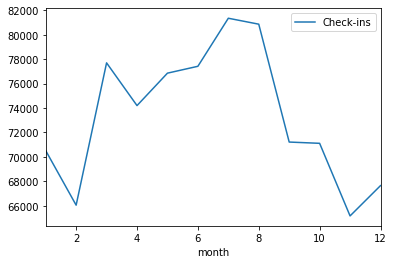

In [9]:
df_checkin_phoenix[~df_checkin_phoenix['year'].isin([2005,2018])][['user_id','month']].groupby('month').count().rename(columns={'user_id':'Check-ins'}).plot()

## plot graph of check-ins grouping by year and month

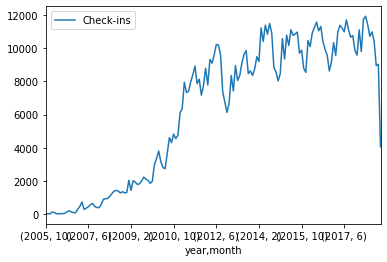

In [10]:
df_checkin_phoenix[['user_id','year','month']].groupby(['year','month']).count().rename(columns={'user_id':'Check-ins'}).plot()

In [11]:
df_checkin_phoenix[['user_id','year','month']].groupby(['year','month']).count().describe()

,user_id
count,158.000000
mean,6267.810127
std,4224.615146
min,6.000000
25%,1516.500000
50%,8007.000000
75%,9923.250000
max,11938.000000


In [12]:
df_persistence=pd.DataFrame(columns=['rate_of_persistence','persistence_rate_change','checkins_train','checkins_test','checkins_test_real'])
df_persistence.index.name="year"

years=df_checkin_phoenix['year'].unique()
years.sort()
years=years.tolist()
# never include last item
number_of_years=len(years)
years_list=list()
old_user_persistence_rate=0
while len(years_list)<number_of_years-1:
    years_list.append(years.pop(0))
    df_checkin_train=df_checkin_phoenix[df_checkin_phoenix['year'].isin(years_list)]['user_id']
    df_checkin_test=df_checkin_phoenix[df_checkin_phoenix['year'].isin(years)][['user_id']]
    
    checkins_training=len(df_checkin_train)
    checkins_test=len(df_checkin_test)
    checkins_test_real=len(pd.merge(df_checkin_train.drop_duplicates(),df_checkin_test,how='inner'))
    
    df_users_training=df_checkin_train.drop_duplicates()
    df_users_test=df_checkin_test.drop_duplicates()
    
    users_training=len(df_users_training)
    users_training_persist_on_test=len(pd.merge(df_users_training,df_users_test,how='inner'))
    rate_of_persistence=users_training_persist_on_test/users_training
    persistence_rate_change=rate_of_persistence-old_user_persistence_rate
    
    df_persistence.loc[years_list[-1]]=[rate_of_persistence,persistence_rate_change,checkins_training,checkins_test,checkins_test_real]
#     df_persistence=df_persistence.append({'rate_of_persistence':rate_of_persistence,
#                            'persistence_rate_change':persistence_rate_change},ignore_index=True)
    
    print("Block border:",years_list[-1],"-",years_list[-1]+1)
    print(years_list,"|",years)
    print("Users in train = %d; Users in test = %d; Rate of persistence: %.4f; Persistence rate change: %.4f."
          % (users_training,users_training_persist_on_test,rate_of_persistence,persistence_rate_change))
    print("Check-ins train = %d; Check-ins test = %d; Check-ins test real = %d."
         % (checkins_training,checkins_test,checkins_test_real))
    print()
    old_user_persistence_rate=rate_of_persistence

Block border: 2005 - 2006
[2005] | [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users in train = 6; Users in test = 6; Rate of persistence: 1.0000; Persistence rate change: 1.0000.
Check-ins train = 32; Check-ins test = 990282; Check-ins test real = 435.

Block border: 2006 - 2007
[2005, 2006] | [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users in train = 50; Users in test = 49; Rate of persistence: 0.9800; Persistence rate change: -0.0200.
Check-ins train = 977; Check-ins test = 989337; Check-ins test real = 5838.

Block border: 2007 - 2008
[2005, 2006, 2007] | [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users in train = 261; Users in test = 250; Rate of persistence: 0.9579; Persistence rate change: -0.0221.
Check-ins train = 6501; Check-ins test = 983813; Check-ins test real = 19381.

Block border: 2008 - 2009
[2005, 2006, 2007, 2008] | [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Us

In [13]:
checkins_total = df_persistence['checkins_train'].iloc[0]+df_persistence['checkins_test'].iloc[0]
df_persistence['checkins_train_rate']=100*df_persistence[['checkins_train']]/checkins_total
checkins_total = df_persistence['checkins_train']+df_persistence['checkins_test_real']
df_persistence['checkins_train_rate_real']=100*df_persistence['checkins_train']/checkins_total
df_persistence['checkins_test_loss']=1-df_persistence['checkins_test_real']/df_persistence['checkins_test']
#df_persistence
df_persistence


,rate_of_persistence,persistence_rate_change,checkins_train,checkins_test,checkins_test_real,checkins_train_rate,checkins_train_rate_real,checkins_test_loss
year,,,,,,,,
2005,1.000000,1.000000,32.0,990282.0,435.0,0.003231,6.852248,0.999561
2006,0.980000,-0.020000,977.0,989337.0,5838.0,0.098656,14.336023,0.994099
2007,0.957854,-0.022146,6501.0,983813.0,19381.0,0.656458,25.117843,0.980300
2008,0.965922,0.008068,20908.0,969406.0,57056.0,2.111250,26.817506,0.941143
2009,0.959794,-0.006129,44107.0,946207.0,119528.0,4.453840,26.954502,0.873677
2010,0.953899,-0.005895,89675.0,900639.0,212078.0,9.055209,29.718014,0.764525
2011,0.940587,-0.013312,181093.0,809221.0,283106.0,18.286422,39.011932,0.650150
2012,0.922815,-0.017771,282713.0,707601.0,313719.0,28.547814,47.400710,0.556644
2013,0.905865,-0.016950,386722.0,603592.0,330772.0,39.050443,53.898987,0.451994


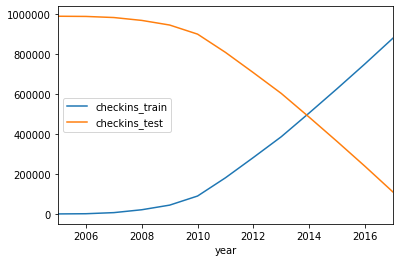

In [14]:
df_persistence[['checkins_train','checkins_test']].plot()

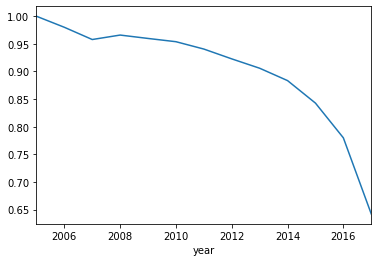

In [15]:
df_persistence.rate_of_persistence.plot()

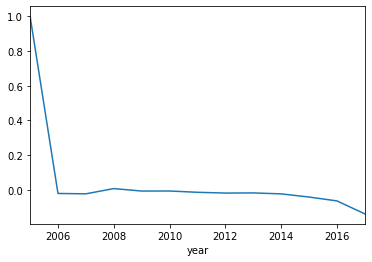

In [16]:
df_persistence.persistence_rate_change.plot()

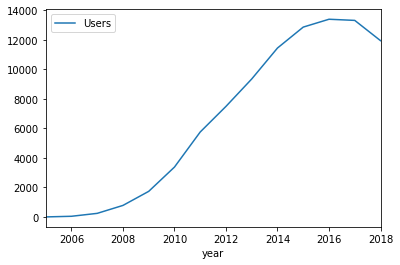

In [17]:
df_checkin_phoenix[['user_id','year']].drop_duplicates(['user_id','year']).groupby('year').count().rename(columns={'user_id':'Users'}).plot()

In [18]:
df_persistence_2017=pd.DataFrame(columns=['user_persistence_rate','persistent_checkins','persistent_users'])
df_persistence_2017.index.name="year"

df_checkin_phoenix_2017=df_checkin_phoenix[df_checkin_phoenix.year == 2017]
df_user_phoenix_2017=df_checkin_phoenix[df_checkin_phoenix.year == 2017]['user_id'].drop_duplicates()

#df_persistence_2017.loc[2017]=[1,len(df_checkin_phoenix_2017),len(df_user_phoenix_2017)]
years=df_checkin_phoenix['year'].unique()
years
years.sort()
years=years.tolist()
years.pop(len(years)-1)

for year in years:
    df_checkin_phoenix_year=df_checkin_phoenix[df_checkin_phoenix.year == year]
    df_user_phoenix_year=df_checkin_phoenix_year['user_id'].drop_duplicates()
    
    user_persistence_rate=len(pd.merge(df_user_phoenix_2017,df_user_phoenix_year))/len(df_user_phoenix_2017)
    persistent_checkins=len(pd.merge(df_user_phoenix_2017,df_checkin_phoenix_year))
    persistent_users=len(pd.merge(df_user_phoenix_2017,df_user_phoenix_year))
    
    df_persistence_2017.loc[year]=[user_persistence_rate,persistent_checkins,persistent_users]
df_persistence_2017

,user_persistence_rate,persistent_checkins,persistent_users
year,,,
2005,0.000075,2.0,1.0
2006,0.001126,188.0,15.0
2007,0.006231,1276.0,83.0
2008,0.024925,4853.0,332.0
2009,0.063363,10044.0,844.0
2010,0.133784,22377.0,1782.0
2011,0.247898,45162.0,3302.0
2012,0.353078,57790.0,4703.0
2013,0.480405,70649.0,6399.0


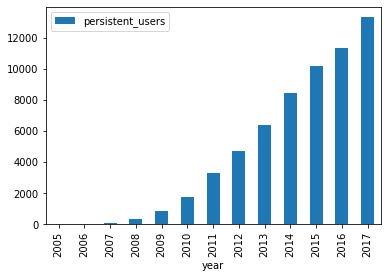

In [19]:
df_persistence_2017[['persistent_users']].plot.bar()

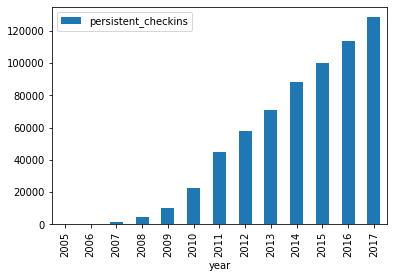

In [20]:
df_persistence_2017[['persistent_checkins']].plot.bar()

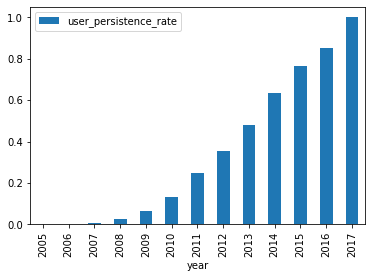

In [21]:
df_persistence_2017[['user_persistence_rate']].plot.bar()

In [22]:
pd.merge(df_checkin_phoenix.drop_duplicates(subset=['user_id','year'])[~df_checkin_phoenix['year'].isin([2017,2018])],
        df_checkin_phoenix[df_checkin_phoenix.year == 2017]['user_id'].drop_duplicates())

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,business_id,date,latitude,longitude,categories,subarea_id,year,month
0,dUVOC_2EDF0sbA392RhfoQ,WTqjgwHlXbSFevF32_DJVw,2015-01-20 20:16:11,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2015,1
1,dUVOC_2EDF0sbA392RhfoQ,qx6WhZ42eDKmBchZDax4dQ,2014-10-17 16:00:30,33.367708,-111.755830,"[Pizza, Italian, Desserts, Sandwiches]",18309.0,2014,10
2,dUVOC_2EDF0sbA392RhfoQ,mPydyOIWcIMevva10WUeDw,2013-07-08 20:53:25,33.292714,-111.760255,"[Auto Repair, Car Dealers]",14434.0,2013,7
3,dUVOC_2EDF0sbA392RhfoQ,lGZD8uQwKueMXKGD-ltE1Q,2016-09-22 17:42:13,33.297363,-111.747581,"[Burgers, Sandwiches, Salad]",14659.0,2016,9
4,8-tL6MQbXPawMlaf8kbqHg,WTqjgwHlXbSFevF32_DJVw,2014-02-04 01:20:04,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2014,2
5,8-tL6MQbXPawMlaf8kbqHg,UBxYchVbEV85B7C50cI-aQ,2016-09-01 20:12:47,33.279658,-111.787938,[Veterinarians],13755.0,2016,9
6,8-tL6MQbXPawMlaf8kbqHg,pL-QrHxQ0kHBDA1ZyOjGQw,2010-12-07 18:33:08,33.318440,-111.892792,"[Health Markets, Grocery, Specialty Food, Orga...",15826.0,2010,12
7,8-tL6MQbXPawMlaf8kbqHg,_skmB-CPcMOJKqeuFMWrFg,2011-09-29 23:09:06,33.333739,-111.782892,"[Hair Salons, Day Spas, Massage, Skin Care]",16490.0,2011,9
8,8-tL6MQbXPawMlaf8kbqHg,T4UDk5oDvl7Lq7uTogSHwg,2015-06-12 06:05:08,33.554570,-111.891976,"[Cosmetic Surgeons, Plastic Surgeons, Skin Car...",27682.0,2015,6
9,8-tL6MQbXPawMlaf8kbqHg,LnIO_JtoDS1xLfTHWuV_ug,2012-11-03 02:42:50,33.279618,-111.790231,"[Desserts, Seafood, Mexican, Caterers]",13755.0,2012,11


In [23]:
df_checkin_phoenix.drop_duplicates(subset=['user_id','year'])[~df_checkin_phoenix['year'].isin([2017,2018])]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,business_id,date,latitude,longitude,categories,subarea_id,year,month
0,dUVOC_2EDF0sbA392RhfoQ,WTqjgwHlXbSFevF32_DJVw,2015-01-20 20:16:11,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2015,1
3,8-tL6MQbXPawMlaf8kbqHg,WTqjgwHlXbSFevF32_DJVw,2014-02-04 01:20:04,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2014,2
4,L8d61tDHFB5CemHBUvxn-g,WTqjgwHlXbSFevF32_DJVw,2016-07-12 20:49:43,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2016,7
5,EJ7ZhRHsMWj8du77LX34gw,WTqjgwHlXbSFevF32_DJVw,2012-06-19 16:05:30,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2012,6
6,UKPkJvtM5ceTng8fG4Wg8A,WTqjgwHlXbSFevF32_DJVw,2014-09-22 16:22:53,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2014,9
9,gmeYoG1_XgVifQFWIpUESw,b1b1eb3uo-w561D0ZfCEiQ,2016-06-01 20:59:17,33.496713,-111.927958,[Teeth Whitening],24725.0,2016,6
14,NlugZGq4Ure9lmw-FvnyAg,b1b1eb3uo-w561D0ZfCEiQ,2016-04-03 01:58:27,33.496713,-111.927958,[Teeth Whitening],24725.0,2016,4
22,_syQ-h8RzyyS8GoshprYTw,b1b1eb3uo-w561D0ZfCEiQ,2016-02-07 22:44:33,33.496713,-111.927958,[Teeth Whitening],24725.0,2016,2
24,ipqkpKJUOwzMRIItRqsjWw,b1b1eb3uo-w561D0ZfCEiQ,2016-10-10 21:40:52,33.496713,-111.927958,[Teeth Whitening],24725.0,2016,10
30,7oMqrqdGai-NgIoc8pfqKQ,b1b1eb3uo-w561D0ZfCEiQ,2016-04-19 12:18:06,33.496713,-111.927958,[Teeth Whitening],24725.0,2016,4
